# Customers segmentation

**Las Wagones** is a company selling IT equipment , from small consumable items to large printers. Las Wagones has identified 4 customers segments noted _A, B, C and D_. These segments have been identified by the Sales department based on a study of the historical buying behavior of the customers. The Marketing department is very interested in understanding who are the customers inside these segments at an early stage. They ordered you for a study. This study aims at understanding what are these 4 segments.

In [1]:
# Load the nbresult package to be able to save your results 
from nbresult import ChallengeResult

## Data collection (9.5%)

### Loading data from the database

Download the `customers.sqlite` database from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.sqlite) and store it inside the `db` folder:

In [2]:
!curl https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.sqlite >> db/customers.sqlite

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  608k  100  608k    0     0  1587k      0 --:--:-- --:--:-- --:--:-- 1591k


#### Database schema

**📝 Open the `db/customers.sqlite` from your favorite SQL client and draw the database schema on the [schema editor](https://kitt.lewagon.com/db) on Kitt. Save the schema as `customers.xml` in the `db` folder.**

#### Querying the data

We want to get the following information about **all** the 8068 customers from the database:
- `id`: the unique identifier of the customer
- `gender`: customer's gender
- `married`: whether or not the customer has ever been married
- `age`: customer's age
- `graduated`: whether or not the customer has a degree
- `score`: customer's spending score (first order)
- `family_size`: the number of members of the customer's family, including the customer
- `profession`: customer's profession
- `work_experience`: customer's work experience in years
- `segment`: the segment the customer belongs to

**📝 Write the SQL query you need to fetch the data. Save it as a `str` in the `query` variable.**

In [3]:
query = '''
    SELECT
        customers.id,
        customers.gender,
        customers.married,
        customers.age,
        customers.graduated,
        customers.score,
        COUNT (relatives.id)+1 AS family_size,
        professions.category AS profession,
        experiences.duration AS work_experience,
        customers.segment
    FROM customers
    LEFT JOIN relatives ON relatives.customer_id = customers.id
    LEFT JOIN experiences ON experiences.customer_id = customers.id
    LEFT JOIN professions ON experiences.profession_id = professions.id
    GROUP BY customers.id
'''

**📝 Connect to the database, execute the query and store the results into a `DataFrame` named `data`. Display the 10 first rows and the shape of the dataset.**

In [4]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('db/customers.sqlite')
data = pd.read_sql_query(query, conn)
data.head(10)

,id,gender,married,age,graduated,score,family_size,profession,work_experience,segment
0,1,Male,No,22,No,Low,4,Healthcare,1.0,D
1,2,Female,Yes,38,Yes,Average,3,Engineer,NaN,A
2,3,Female,Yes,67,Yes,Low,1,Engineer,1.0,B
3,4,Male,Yes,67,Yes,High,2,Lawyer,0.0,B
4,5,Female,Yes,40,Yes,High,6,Entertainment,NaN,A
5,6,Male,Yes,56,No,Average,2,Artist,0.0,C
6,7,Male,No,32,Yes,Low,3,Healthcare,1.0,C
7,8,Female,No,33,Yes,Low,3,Healthcare,1.0,D
8,9,Female,Yes,61,Yes,Low,3,Engineer,0.0,D
9,10,Female,Yes,55,Yes,Average,4,Artist,1.0,C


#### 💾 Save your results

Run the following cell to save your results.

In [5]:
ChallengeResult('sql', query=query).write()

### Loading data from a CSV file

**📝 Load the data from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.csv) inside a `DataFrame` named `customers`.** 

Also, you can download the dataset into the `data` directory.

In [6]:
url = "https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers.csv"
customers = pd.read_csv(url)
customers.head(10)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,D
8,465015,Female,Yes,61,Yes,Engineer,0.0,Low,3.0,D
9,465176,Female,Yes,55,Yes,Artist,1.0,Average,4.0,C


**💾 Save your results**

Run the following cell to save your results.

In [7]:
ChallengeResult('csv', data=customers).write()

## Data consulting challenge (33%)

### Data analysis & presentation

> Who are the customers composing the 4 segments? 

Based on the analysis of the `customers` dataset, prepare a slides deck to present your conclusions to the Marketing manager Debrah. The presentation must contain **5 slides maximum** (including the title slide). Feel free to choose the slide app of your choice.

ℹ️ Debrah is in fond of illustrations and statistics!

⚠️ Save your presentation in the current directory!

In [8]:
# Start your data analysis!

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Who are the customers composing the 4 segments?

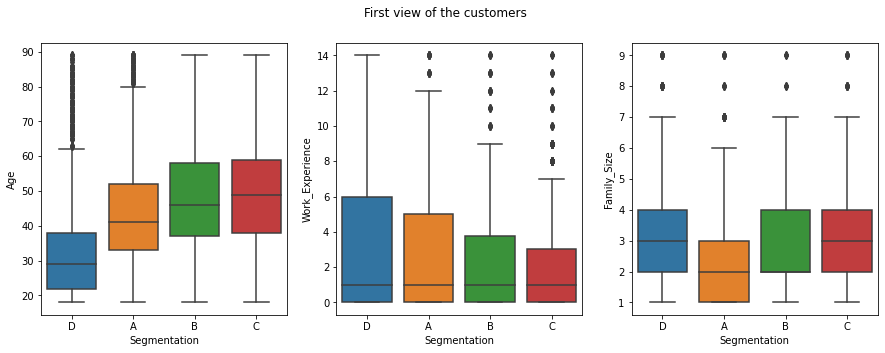

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('First view of the customers')
sns.boxplot(ax=axes[0], y="Age", x="Segmentation", data=customers)
sns.boxplot(ax=axes[1], y="Work_Experience", x="Segmentation", data=customers)
sns.boxplot(ax=axes[2], y="Family_Size", x="Segmentation", data=customers);

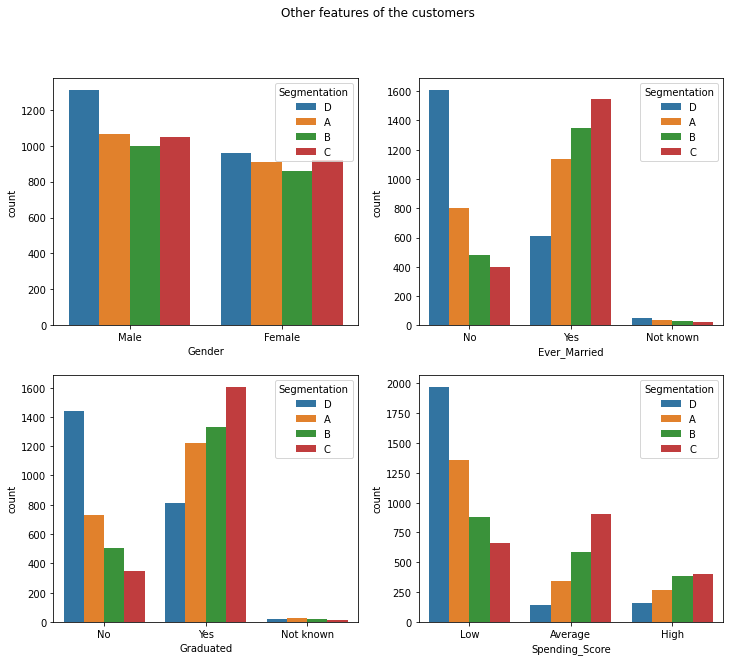

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Other features of the customers')
sns.countplot(ax=axes[0,0], x="Gender", hue="Segmentation", data=customers)
sns.countplot(ax=axes[0,1], x="Ever_Married", hue="Segmentation", data=customers.fillna(value='Not known'))
sns.countplot(ax=axes[1,0], x="Graduated", hue="Segmentation", data=customers.fillna(value='Not known'))
sns.countplot(ax=axes[1,1], x="Spending_Score", hue="Segmentation", data=customers);

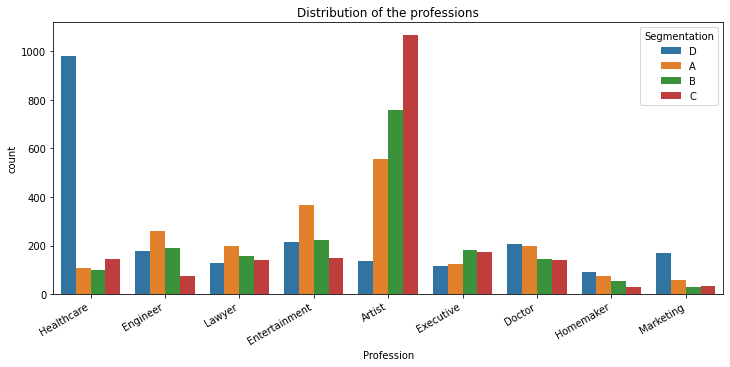

In [12]:
plt.figure(figsize=(12,5))
sns.countplot(x="Profession", hue="Segmentation", data=customers)
plt.title('Distribution of the professions')
plt.xticks(rotation=30, ha='right');

### Segmentation relevance

Debrah has a doubt about the number of customers segments designed by the Sales department. Base on an empirical method, the elbow method, and a clustering approach **can you tell her if it is an optimal segmentation or not?**

Store the optimal number of segments inside the `n_clusters` variable.

In [13]:
customers.dropna(inplace=True)

In [14]:
customers.drop(columns='ID', inplace=True)

In [15]:
customers_encoded = pd.get_dummies(customers).copy()

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
customers_encoded[['Age', 'Work_Experience', 'Family_Size']] = scaler.fit_transform(customers_encoded[['Age', 'Work_Experience', 'Family_Size']])

In [17]:
customers_encoded.iloc[:, :-4].head()

,Age,Work_Experience,Family_Size,Gender_Female,Gender_Male,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes,Profession_Artist,...,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,0.056338,0.071429,0.375,0,1,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,0.690141,0.071429,0.000,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
3,0.690141,0.000000,0.125,0,1,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
5,0.535211,0.000000,0.125,0,1,0,1,1,0,1,...,0,0,0,0,0,0,0,1,0,0
6,0.197183,0.071429,0.250,0,1,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


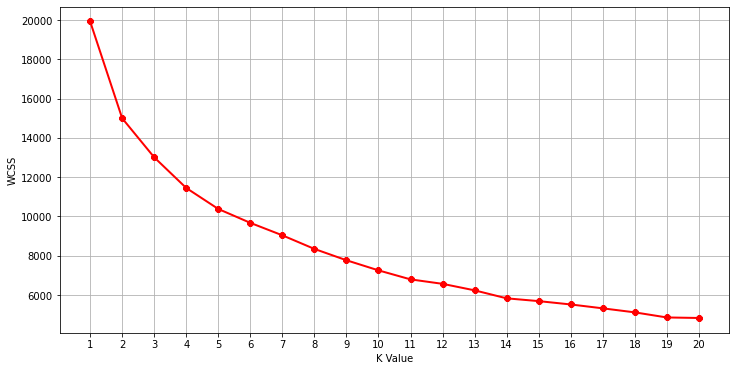

In [18]:
import numpy as np
from sklearn.cluster import KMeans
wcss = []
for k in range(1,21):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(customers_encoded.iloc[:,:-4]) # Selectionne les colonnes sauf celles pour la segmentation"
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,21),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,21,1))
plt.ylabel("WCSS")
plt.show()

In [19]:
n_clusters = 2

**💾 Save your results**

Run the following cell to save your results.

In [20]:
ChallengeResult('clusters', n_clusters=n_clusters).write()

### Segment D statistics

In addition the marketing team is really interested in the **segment D** so you will have to answer some questions about it. 

To do so, we are considering a binary segmentation: **D vs the rest**. Download the `customers_encoded.csv` dataset from this [URL](https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers_encoded.csv) and store it into the `data` folder.

#### Loading data

In [21]:
# Load the data and display the first rows
url = "https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/customers_encoded.csv"
customers_encoded = pd.read_csv(url)
customers_encoded.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Segmentation,is_D
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,D,1
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,A,0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,B,0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,B,0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,A,0


After loading the data you can see a new column `is_D` which take the value `1` if the customer belongs to the segment D, `0` otherwise.

#### Age analysis of segment D

❓ Using a statistical test, show than customers from segment D are **statistically younger** than the whole customers. 

Store the $p-value$ of your test inside a `p_value` variable.

In [22]:
# Test
customers_encoded[customers_encoded['is_D'] == 1]['Age'].mean(), customers_encoded['Age'].mean()

(33.39021164021164, 43.46690629647992)

In [23]:
# p_value
import statsmodels.formula.api as smf
model = smf.logit(formula="is_D ~ Age", data=customers_encoded).fit()
result=model.pvalues

Optimization terminated successfully.
         Current function value: 0.507995
         Iterations 6


In [24]:
result

Intercept    7.425076e-102
Age          3.283952e-213
dtype: float64

In [25]:
p_value = result['Age']
p_value

3.283952338024984e-213

La p-value est faible, top !

#### Segment D odds analysis

❓ What are the **odds** for a customer to be in the segment D?

Store the result inside a `odds` variable.

In [26]:
# odds
odds = len(customers_encoded[customers_encoded['is_D'] == 1]) / len(customers_encoded)
odds

0.2811105602379772

❓ Considering a **married and graduated** customer, how are the odds of being part of segment D **multiplied** while **increasing** the age by 1 year?

Store the result inside a `odds_variation` variable.

In [27]:
married = customers_encoded[customers_encoded['Ever_Married'] == 'Yes'].copy()
married_graduated = married[married['Graduated'] == 'Yes'].copy()
married_graduated.drop(columns=['Ever_Married', 'Graduated'], inplace=True)

In [28]:
model2 = smf.logit(formula="is_D ~ Age", data=married_graduated).fit()
model2.params

Optimization terminated successfully.
         Current function value: 0.285276
         Iterations 7


Intercept   -1.242967
Age         -0.023062
dtype: float64

In [29]:
# odds_variation
odds_variation = model2.params['Age']
odds_variation

-0.023062261386234014

Les chances d'être dans D baissent de 2% pour chaque augmentation d'un an d'âge

####  💾 Save your results

Run the following cell to save your results.

In [30]:
ChallengeResult('segment_d', p_value=p_value, odds=odds, gap=odds_variation).write()

**⚠️ Save your notebook then commit and push your code on GitHub**